# Health Nutrition and Population Statistics
This dataset from the World Bank's Health, Nutrition, and Population Statistics offers a rich foundation for exploring health-related trends over time across various countries. It contains data fr various sources, such as UNICEF, WHO, US Census Bureau, local governments data, and many more. The data are fromom 1960 to 20 with 125,020 rows and 68 columns including columns for Country Name, Country Code, Indicator Name, and Indicator Code, as well as annual data for each year in this range.3. Themes include global surgery, health financing, HIV/AIDS, immunization, infectious diseases, medical resources and usage, noncommunicable diseases, nutrition, population dynamics, reproductive health, universal health coverage, and water and sanitation.

In [2]:
from pathlib import Path
print(Path.cwd())

/Users/gimle/Data 201/HNP_Stats_CSV


In [3]:
# Cell 1
import pandas as pd

# Load the dataset to inspect its structure and contents
file_path = "/Users/gimle/Data 201/HNP_Stats_CSV/HNP_StatsCSV.csv"
data = pd.read_csv(file_path)

# Display the first few rows and summary information about the dataset
data.head(10), data.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125020 entries, 0 to 125019
Data columns (total 68 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    125020 non-null  object 
 1   Country Code    125020 non-null  object 
 2   Indicator Name  125020 non-null  object 
 3   Indicator Code  125020 non-null  object 
 4   1960            41829 non-null   float64
 5   1961            42383 non-null   float64
 6   1962            42497 non-null   float64
 7   1963            42546 non-null   float64
 8   1964            42602 non-null   float64
 9   1965            42762 non-null   float64
 10  1966            42703 non-null   float64
 11  1967            42761 non-null   float64
 12  1968            42831 non-null   float64
 13  1969            42928 non-null   float64
 14  1970            44334 non-null   float64
 15  1971            45054 non-null   float64
 16  1972            45123 non-null   float64
 17  1973      

(                  Country Name Country Code  \
 0  Africa Eastern and Southern          AFE   
 1  Africa Eastern and Southern          AFE   
 2  Africa Eastern and Southern          AFE   
 3  Africa Eastern and Southern          AFE   
 4  Africa Eastern and Southern          AFE   
 
                                       Indicator Name  Indicator Code  \
 0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
 1  Adults (ages 15+) and children (0-14 years) li...     SH.HIV.TOTL   
 2  Adults (ages 15+) and children (ages 0-14) new...  SH.HIV.INCD.TL   
 3                  Adults (ages 15+) living with HIV     SH.DYN.AIDS   
 4        Adults (ages 15-49) newly infected with HIV     SH.HIV.INCD   
 
          1960        1961        1962        1963        1964       1965  ...  \
 0  140.180526  140.810248  141.664168  142.324951  143.456933  144.33115  ...   
 1         NaN         NaN         NaN         NaN         NaN        NaN  ...   
 2         NaN         N

In [4]:
from IPython.display import display, HTML

# Display the DataFrame with scrollable output
display(HTML(data.to_html(max_rows= 10, max_cols=68)))

In [5]:
# Set pandas options to display numbers in decimal format
pd.options.display.float_format = '{:.5f}'.format # "{:.5f}.format" will display numbers with 5 decimal places.


In [6]:
# Define the path to the folder containing the files
folder_path = r"/Users/gimle/Data 201/HNP_Stats_CSV"

# Import each metadata file
country_data = pd.read_csv(f"{folder_path}/HNP_StatsCountry.csv")
country_series_data = pd.read_csv(f"{folder_path}/HNP_Statscountry-series.csv")
footnote_data = pd.read_csv(f"{folder_path}/HNP_Statsfootnote.csv")
series_data = pd.read_csv(f"{folder_path}/HNP_StatsSeries.csv")
series_time_data = pd.read_csv(f"{folder_path}/HNP_Statsseries-time.csv")

# Display the first few rows of each dataset to verify the import
country_data.head(), country_series_data.head(), footnote_data.head(), series_data.head(), series_time_data.head()

(  Country Code                   Short Name                   Table Name  \
 0          ABW                        Aruba                        Aruba   
 1          AFE  Africa Eastern and Southern  Africa Eastern and Southern   
 2          AFG                  Afghanistan                  Afghanistan   
 3          AFW   Africa Western and Central   Africa Western and Central   
 4          AGO                       Angola                       Angola   
 
                       Long Name 2-alpha code   Currency Unit  \
 0                         Aruba           AW   Aruban florin   
 1   Africa Eastern and Southern           ZH             NaN   
 2  Islamic State of Afghanistan           AF  Afghan afghani   
 3    Africa Western and Central           ZI             NaN   
 4   People's Republic of Angola           AO  Angolan kwanza   
 
                                        Special Notes  \
 0                                                NaN   
 1  26 countries, stretching f

In [7]:
# Reload the main dataset
main_data = data
# Perform the merge with main dataset
# First, add country-specific information from HNP_StatsCountry.csv
merged_data1 = main_data.merge(country_data, how='left', left_on='Country Code', right_on='Country Code')

# Next, add indicator descriptions from HNP_StatsSeries.csv
merged_data2 = merged_data1.merge(series_data, how='left', left_on='Indicator Code', right_on='Series Code')

# Display the first few rows of the merged dataset to confirm integration
merged_data2.head(10)


Country Name Country Code  \
0  Africa Eastern and Southern          AFE   
1  Africa Eastern and Southern          AFE   
2  Africa Eastern and Southern          AFE   
3  Africa Eastern and Southern          AFE   
4  Africa Eastern and Southern          AFE   

                                    Indicator Name_x  Indicator Code  \
0  Adolescent fertility rate (births per 1,000 wo...     SP.ADO.TFRT   
1  Adults (ages 15+) and children (0-14 years) li...     SH.HIV.TOTL   
2  Adults (ages 15+) and children (ages 0-14) new...  SH.HIV.INCD.TL   
3                  Adults (ages 15+) living with HIV     SH.DYN.AIDS   
4        Adults (ages 15-49) newly infected with HIV     SH.HIV.INCD   

       1960      1961      1962      1963      1964      1965  ...  \
0 140.18053 140.81025 141.66417 142.32495 143.45693 144.33115  ...   
1       NaN       NaN       NaN       NaN       NaN       NaN  ...   
2       NaN       NaN       NaN       NaN       NaN       NaN  ...   
3       NaN       NaN       NaN       NaN       NaN       NaN  ...   
4       NaN       NaN       NaN       NaN       NaN       NaN  ...   

   Limitations and exceptions  Notes from original source  \
0                         NaN                         NaN   
1                         NaN                         NaN   
2                         NaN                         NaN   
3                         NaN                         NaN   
4                         NaN                         NaN   

                                    General comments  \
0  This is the Sustainable Development Goal indic...   
1                                                NaN   
2  This indicator is related to Sustainable Devel...   
3                                                NaN   
4  This indicator is related to Sustainable Devel...   

                                              Source  \
0  United Nations Population Division, World Popu...   
1                                  UNAIDS estimates.   
2                                  UNAIDS estimates.   
3                                  UNAIDS estimates.   
4                                  UNAIDS estimates.   

                 Statistical concept and methodology  \
0  Reproductive health is a state of physical and...   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                               Development relevance  Related source links  \
0                                                NaN                   NaN   
1                                                NaN                   NaN   
2  Despite the existence of effective medications...                   NaN   
3                                                NaN                   NaN   
4  Despite the existence of effective medications...                   NaN   

   Other web links  Related indicators  License Type  
0              NaN                 NaN     CC BY-4.0  
1              NaN                 NaN     CC BY-4.0  
2              NaN                 NaN     CC BY-4.0  
3              NaN                 NaN     CC BY-4.0  
4              NaN                 NaN     CC BY-4.0  

[5 rows x 118 columns]

In [8]:
# Display unique indicators
unique_indicators = merged_data2['Indicator Name_x'].unique()
unique_indicators_df = pd.DataFrame(unique_indicators, columns=["Indicator Name"]).sort_values(by="Indicator Name").reset_index(drop=True)

# Show the unique indicators
unique_indicators_df

Indicator Name
0             AIDS estimated deaths (UNAIDS estimates)
1    ARI treatment (% of children under 5 taken to ...
2    Adolescent fertility rate (births per 1,000 wo...
3    Adults (ages 15+) and children (0-14 years) li...
4    Adults (ages 15+) and children (ages 0-14) new...
..                                                 ...
465           Wanted fertility rate (births per woman)
466  Women who were first married by age 15 (% of w...
467  Women who were first married by age 18 (% of w...
468  Women's share of population ages 15+ living wi...
469  Young people (ages 15-24) newly infected with HIV

[470 rows x 1 columns]

In [9]:
# Define the path in the Documents folder
file_path = r"/Users/gimle/Data 201/HNP_Stats_CSV/unique_indicators.csv"

# Save the DataFrame as a CSV file to this path
unique_indicators_df.to_csv(file_path, index=False)

In [10]:
# Check for missing values in each column
missing_values = merged_data2.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
missing_values[missing_values > 0]

Unit of measure         125020
Other notes             125020
Related indicators      125020
Other web links         125020
Related source links    125020
                         ...  
2-alpha code              1410
WB-2 code                  940
Long Name                  470
Table Name                 470
Short Name                 470
Length: 109, dtype: int64

In [11]:
# Identify year columns (assuming they are numeric and represent years)
year_columns = [col for col in merged_data2.columns if col.isdigit()]

# Separate the year columns and non-year columns
year_data = merged_data2[year_columns]
non_year_data = merged_data2.drop(columns=year_columns)

# Drop columns with more than 75% missing values in non-year data only
threshold = len(non_year_data) * 0.75
cleaned_non_year_data = non_year_data.dropna(axis=1, thresh=threshold)

# Recombine the year data with the cleaned non-year data
merged_data = pd.concat([cleaned_non_year_data, year_data], axis=1)

# Display the updated data
from IPython.display import display, HTML
display(HTML(merged_data.to_html(max_rows=10, max_cols=40)))

# Here will be my scatterplot

In [13]:
# We will only be comparing fertility and education between 1993 and 2020 so I deselect all other columns
keep_col = [
    'Country Name', 
    'Region', 
    'Indicator Name_x',
    '1999', 
    '2019']

filtered_merged = merged_data[keep_col]
# We can select out all the 'region' statistics by dropping those countries without a region signifier
filtered_merged = filtered_merged.dropna(subset=['Region'])


In [14]:

# I want to look at fertility rates amongst young women, and how that might impact their education
fertility = filtered_merged[filtered_merged['Indicator Name_x']=='Adolescent fertility rate (births per 1,000 women ages 15-19)']
secondary = filtered_merged[filtered_merged['Indicator Name_x']== 'School enrollment, secondary, female (% gross)']


In [15]:
# Pivoting step, so that the values 
pivot_fert1 = fertility.pivot(index=['Country Name', 'Region'], 
                              columns='Indicator Name_x', 
                              values=['1999']).rename(
                                                columns={'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'Fertility Rate 1999'})

pivot_fert2 = fertility.pivot(index=['Country Name', 'Region'], 
                              columns='Indicator Name_x', 
                              values=['2019']).rename(
                                                columns={'Adolescent fertility rate (births per 1,000 women ages 15-19)': 'Fertility Rate 2019'})

display(HTML(pivot_fert1.to_html(max_rows=10, max_cols=6)))

In [16]:
# Pivoting and renaming the columns

pivot_sec1 = secondary.pivot(index=['Country Name', 'Region'],
                             columns='Indicator Name_x', 
                             values=['1999']).rename(
                                            columns={'School enrollment, secondary, female (% gross)': 'Secondary Schooling 1999'})

pivot_sec2 = secondary.pivot(index=['Country Name', 'Region'],
                             columns='Indicator Name_x', 
                             values=['2019']).rename(
                                            columns={'School enrollment, secondary, female (% gross)': 'Secondary Schooling 2019'})
# a check
display(HTML(pivot_sec2.to_html(max_rows= 10, max_cols=6)))

In [17]:
# Merging each category with itself
fert_comb = pivot_fert1.merge(pivot_fert2, on=['Country Name', 'Region'], how='outer')
secondary_comb = pivot_sec1.merge(pivot_sec2, on=['Country Name', 'Region'], how='outer')


In [18]:
# final merge
secondary_v_fertility = fert_comb.merge(secondary_comb, on=['Country Name', 'Region'], how='outer')
display(HTML(secondary_v_fertility.to_html(max_rows=10, max_cols=6)))


In [19]:
secondary_v_fertility.columns = secondary_v_fertility.columns.get_level_values(1)

In [20]:
print(secondary_v_fertility.columns)

Index(['Fertility Rate 1999', 'Fertility Rate 2019',
       'Secondary Schooling 1999', 'Secondary Schooling 2019'],
      dtype='object', name='Indicator Name_x')


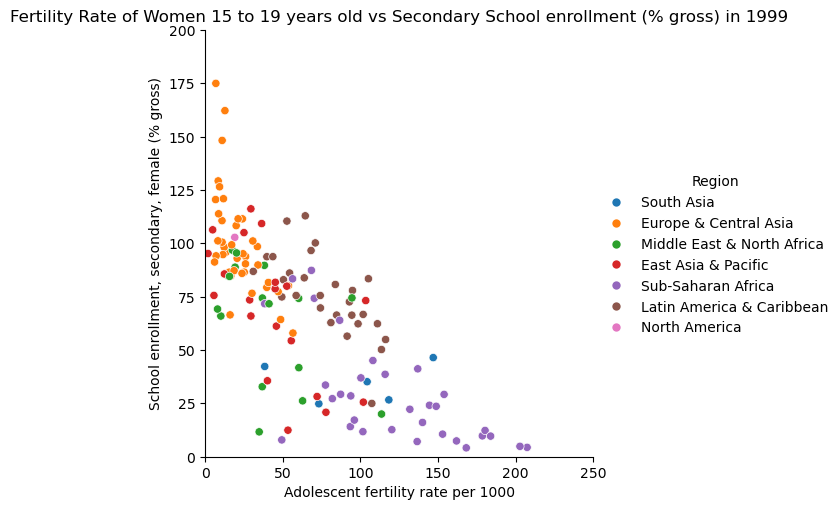

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.relplot(x = 'Fertility Rate 1999',
            y = "Secondary Schooling 1999", 
            data = secondary_v_fertility,
            kind= "scatter", 
            hue = 'Region',
            )

# Show plot
plt.title('Fertility Rate of Women 15 to 19 years old vs Secondary School enrollment (% gross) in 1999')
plt.xlabel('Adolescent fertility rate per 1000')
plt.ylabel('School enrollment, secondary, female (% gross)')
plt.ylim(0, 200)
plt.xlim(0,250)
plt.show()

                                                                                                            



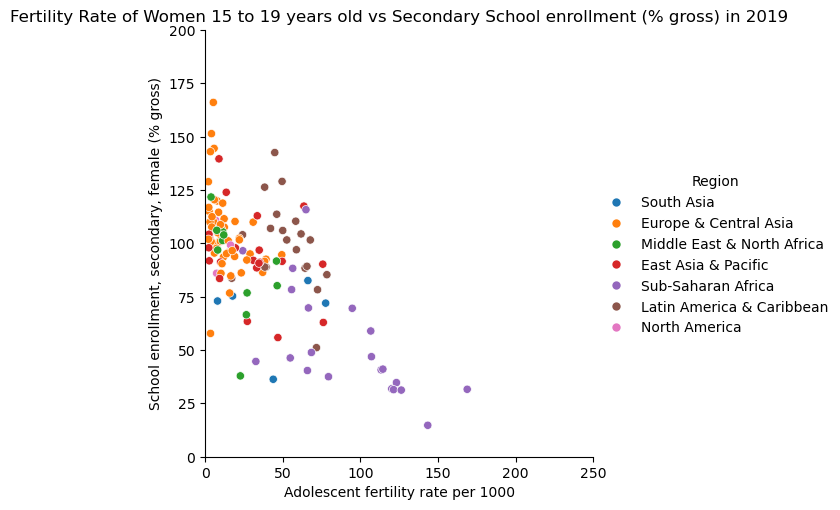

In [22]:
sns.relplot(x = 'Fertility Rate 2019',
            y = "Secondary Schooling 2019", 
            data = secondary_v_fertility,
            kind= "scatter", 
            hue = 'Region',
            )

# Show plot
plt.title('Fertility Rate of Women 15 to 19 years old vs Secondary School enrollment (% gross) in 2019')
plt.xlabel('Adolescent fertility rate per 1000')
plt.ylabel('School enrollment, secondary, female (% gross)')
plt.ylim(0, 200)
plt.xlim(0,250)
plt.show()


In [23]:
# Add: Number of under-five deaths

In [24]:
# Replace all missing values with an empty string
cleaned_data = merged_data.fillna("")
display(HTML(cleaned_data.to_html(max_rows= 200, max_cols=200)))

In [25]:
# Verify that missing values have been handled
missing_values_after = merged_data.isnull().sum().sort_values(ascending=False)
missing_values_after[missing_values_after > 0]  # This should ideally show an empty result

2023            85835
1960            83191
1961            82637
1962            82523
1963            82474
                ...  
2-alpha code     1410
WB-2 code         940
Short Name        470
Table Name        470
Long Name         470
Length: 78, dtype: int64

In [26]:
# Sort the dataset by 'Region' and then by 'Country Name' within each region
arranged_data = cleaned_data.sort_values(by=['Region', 'Country Name']).reset_index(drop=True)

# Display the arranged data, showing each country and its region
arranged_data[['Country Name', 'Country Code', 'Region']].drop_duplicates()



In [27]:
# Define relevant indicators based on the questions of interest
indicators_of_interest = [
    # Health-related indicators
    'Prevalence of HIV, total (% of population ages 15-49)',
    'Prevalence of HIV, female (% ages 15-24)',
    'Prevalence of HIV, male (% ages 15-24)',
    'Incidence of HIV, all (per 1,000 uninfected population)',
    'Incidence of HIV, ages 15-24 (per 1,000 uninfected population ages 15-24)',
    'Incidence of HIV, ages 15-49 (per 1,000 uninfected population ages 15-49)',
    'Condom use at last high-risk sex, adult female (% ages 15-49)',
    'Condom use at last high-risk sex, adult male (% ages 15-49)',
    'Antiretroviral therapy coverage (% of people living with HIV)',
    'Birth rate, crude (per 1,000 people)',
    'Life expectancy at birth, female (years)',
    'Life expectancy at birth, male (years)',
    'Life expectancy at birth, total (years)',
    'Different mortality rates',

    # Education-related indicators
    'Literacy rate, adult female (% of females ages 15 and above)',
    'Literacy rate, adult male (% of males ages 15 and above)',
    'Literacy rate, adult total (% of people ages 15 and above)',
    'Literacy rate, youth male (% of males ages 15-24)',
    'Literacy rate, youth total (% of people ages 15-24)',
    'School enrollment, primary, female (% gross)',
    'School enrollment, primary, male (% gross)',
    'School enrollment, secondary, female (% gross)',
    'School enrollment, secondary, male (% gross)',
    'School enrollment, tertiary, female (% gross)',
    'Human capital index (HCI), female',
    'Human capital index (HCI), male',

    # Poverty and healthcare expenditure indicators
    'Proportion of population pushed below the $2.15 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)',
    'Proportion of population pushed below the $3.65 ($ 2017 PPP) poverty line by out-of-pocket health care expenditure (%)',
    'Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%)',
    'Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care expenditure (%)'
]

# Filter the data for these indicators
filtered_data = arranged_data[arranged_data['Indicator Name_x'].isin(indicators_of_interest)]

# Filter the columns for the years 2010 to 2023 and necessary metadata columns
year_columns = [str(year) for year in range(2010, 2024)]
columns_to_keep = ['Country Name', 'Country Code', 'Region', 'Indicator Name_x'] + year_columns

# Filter for relevant columns and verify
filtered_data = filtered_data[columns_to_keep]
display(HTML(filtered_data.to_html(max_rows=10, max_cols=20)))

In [28]:
#For a random sampling, I select a random 10% sample of the data for analysis.
sample_data = filtered_data.sample(frac=0.1, random_state=20)
display(HTML(sample_data.to_html(max_rows=10, max_cols=20)))

In [29]:
# Generate summary statistics for the filtered dataset
summary_stats = filtered_data.describe(include='all')

# Display summary statistics
summary_stats

Country Name Country Code                 Region  \
count                          7182         7182                   7182   
unique                          266          266                      8   
top     Africa Eastern and Southern          AFE  Europe & Central Asia   
freq                             27           27                   1566   

                                         Indicator Name_x  2010  2011  2012  \
count                                                7182  7182  7182  7182   
unique                                                 27  2835  2850  2801   
top     Antiretroviral therapy coverage (% of people l...                     
freq                                                  266  3380  3398  3431   

        2013  2014  2015  2016  2017  2018  2019  2020  2021  2022  2023  
count   7182  7182  7182  7182  7182  7182  7182  7182  7182  7182  7182  
unique  2703  2808  2820  2741  2723  2739  2671  2611  2609  2367    74  
top                                                                       
freq    3536  3442  3378  3477  3508  3499  3581  3679  3661  4003  7109

# Cut chunk below 

In [31]:

# Function to plot interactive line plots with Plotly
#def plot_interactive_line(data, title):
#    year_columns = [str(year) for year in range(2010, 2024)]
#    melted_data = data.melt(id_vars=['Region'], value_vars=year_columns,
#                            var_name='Year', value_name='Value')
#   melted_data['Year'] = pd.to_numeric(melted_data['Year'])
 
# Plot interactive line plots for each age group and measure
#for indicator in prevalence_indicators:
#    plot_interactive_line(prevalence_data[prevalence_data['Indicator Name_x'] == indicator], f'HIV Prevalence - {indicator} (2010-2023)')

#for indicator in incidence_indicators:
#   plot_interactive_line(incidence_data[incidence_data['Indicator Name_x'] == indicator], f'HIV Incidence - {indicator} (2010-2023)')


In [32]:
import seaborn as sns
import pandas as pd

# Filter for relevant indicators and select the year 2018
condom_data = filtered_data[
    (filtered_data['Indicator Name_x'].str.contains('Condom use', case=False, na=False)) & 
    (filtered_data['2018'].notna())
].rename(columns={'2018': '2018_condom'})

hiv_data = filtered_data[
    (filtered_data['Indicator Name_x'].str.contains('HIV Prevalence', case=False, na=False)) & 
    (filtered_data['2018'].notna())
].rename(columns={'2018': '2018_hiv'})


# Select only relevant columns
condom_data = condom_data[['Country Name', 'Region', '2018_condom']]
hiv_data = hiv_data[['Country Name', '2018_hiv']]
print(hiv_data.head(5))
print(condom_data.head(5))


Empty DataFrame
Columns: [Country Name, 2018_hiv]
Index: []
                     Country Name Region 2018_condom
87    Africa Eastern and Southern                   
88    Africa Eastern and Southern                   
557    Africa Western and Central                   
558    Africa Western and Central                   
1027                   Arab World                   


In [33]:
# Merge the two datasets on 'Country Name' and 'Region'
merged_data = pd.merge(condom_data, hiv_data, on=['Country Name'], how='left')

print(merged_data.head(5))

                  Country Name Region 2018_condom 2018_hiv
0  Africa Eastern and Southern                         NaN
1  Africa Eastern and Southern                         NaN
2   Africa Western and Central                         NaN
3   Africa Western and Central                         NaN
4                   Arab World                         NaN


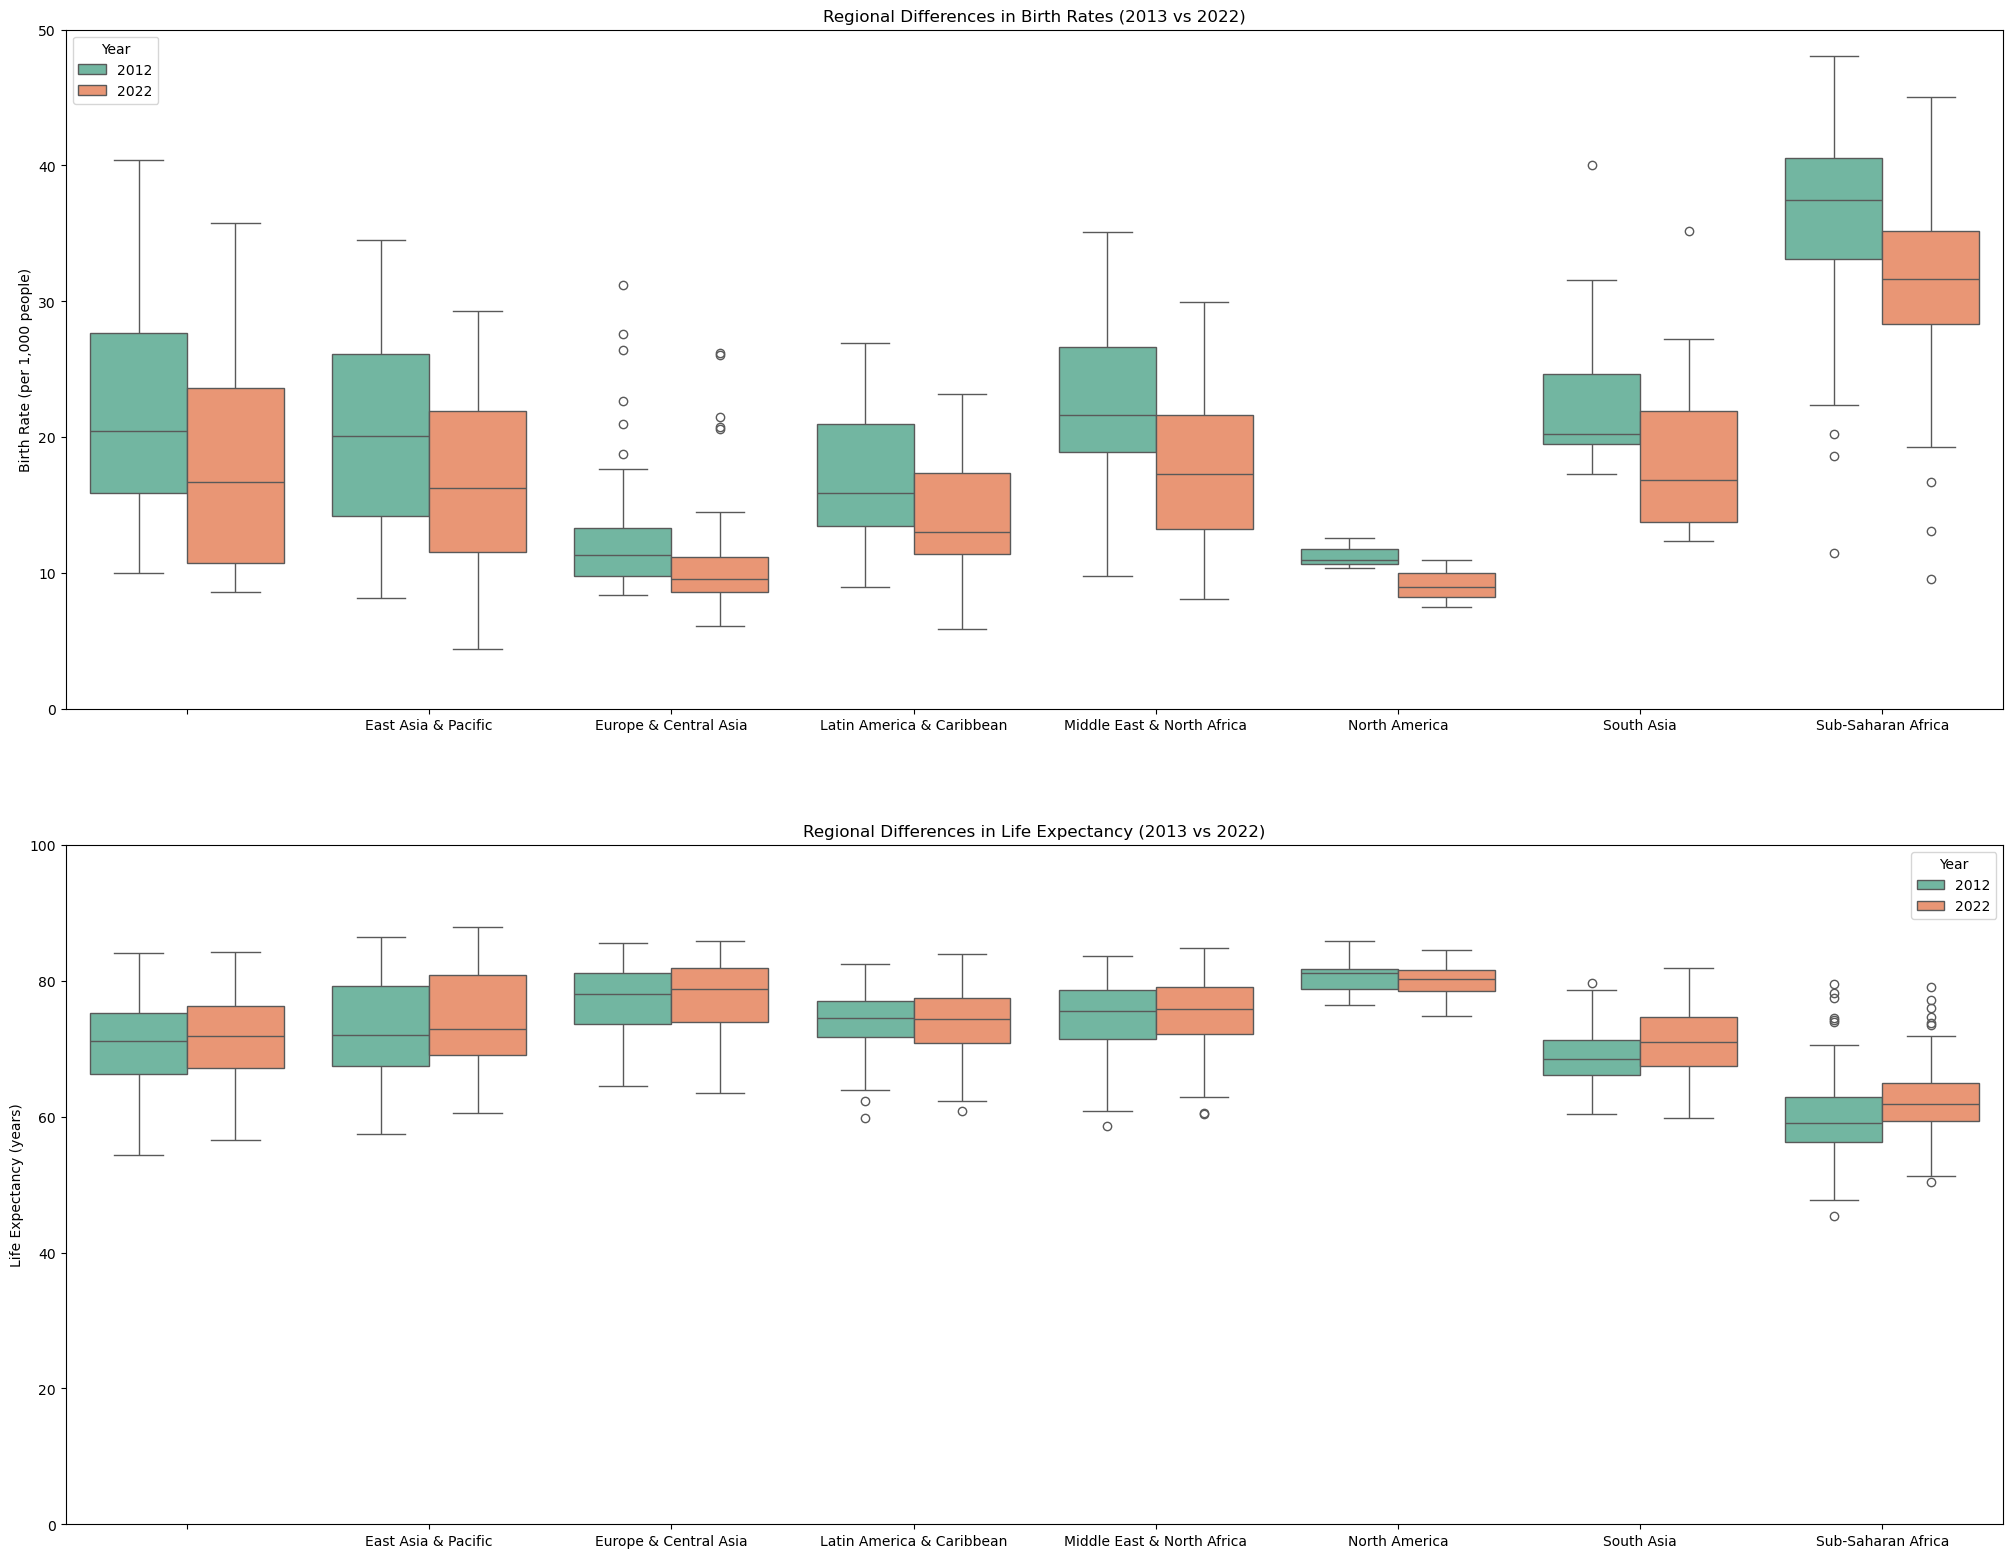

In [34]:
# Filter data for birth rate, life expectancy, and mortality indicators
birth_rate_data = filtered_data[filtered_data['Indicator Name_x'].str.contains('Birth rate')]
life_expectancy_data = filtered_data[filtered_data['Indicator Name_x'].str.contains('Life expectancy')]

# Define years for comparison
years = ['2012', '2022']

# Melt data to have 'Year' as a column for easy comparison
birth_rate_data_melted = birth_rate_data.melt(id_vars=['Region'], value_vars=years, var_name='Year', value_name='Birth Rate')
life_expectancy_data_melted = life_expectancy_data.melt(id_vars=['Region'], value_vars=years, var_name='Year', value_name='Life Expectancy')

# Set up the figure and axis
plt.figure(figsize=(25, 30))

# Plot for Birth Rate
plt.subplot(3, 1, 1)
sns.boxplot(data=birth_rate_data_melted, x='Region', y='Birth Rate', hue='Year', palette="Set2")
plt.title('Regional Differences in Birth Rates (2013 vs 2022)')
plt.xlabel('')
plt.ylabel('Birth Rate (per 1,000 people)')
plt.ylim(0, 50)


# Plot for Life Expectancy
plt.subplot(3, 1, 2)
sns.boxplot(data=life_expectancy_data_melted, x='Region', y='Life Expectancy', hue='Year', palette="Set2")
plt.title('Regional Differences in Life Expectancy (2013 vs 2022)')
plt.xlabel('')
plt.ylabel('Life Expectancy (years)')
plt.gca().invert_yaxis()
plt.ylim(0, 100)


plt.show()


In [35]:
# Filter data for literacy rates and school enrollment by gender
literacy_data = filtered_data[filtered_data['Indicator Name_x'].str.contains('Literacy rate')]
enrollment_data = filtered_data[filtered_data['Indicator Name_x'].str.contains('School enrollment')]

# Select the year for comparison
year = '2022'

In [36]:
# Create a Gender column based on Indicator Name for both literacy and enrollment data
literacy_data['Gender'] = literacy_data['Indicator Name_x'].apply(lambda x: 'Female' if 'female' in x.lower() else 'Male' if 'male' in x.lower() else 'Unknown')
enrollment_data['Gender'] = enrollment_data['Indicator Name_x'].apply(lambda x: 'Female' if 'female' in x.lower() else 'Male' if 'male' in x.lower() else 'Unknown')

# Now filter to include only male and female rows (exclude 'Unknown' if any)
literacy_data = literacy_data[literacy_data['Gender'] != 'Unknown']
enrollment_data = enrollment_data[enrollment_data['Gender'] != 'Unknown']

/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_13089/3418646452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  literacy_data['Gender'] = literacy_data['Indicator Name_x'].apply(lambda x: 'Female' if 'female' in x.lower() else 'Male' if 'male' in x.lower() else 'Unknown')
/var/folders/vt/8zqwv5_51777lk_0p42g3sdr0000gn/T/ipykernel_13089/3418646452.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enrollment_data['Gender'] = enrollment_data['Indicator Name_x'].apply(lambda x: 'Female' if 'fe

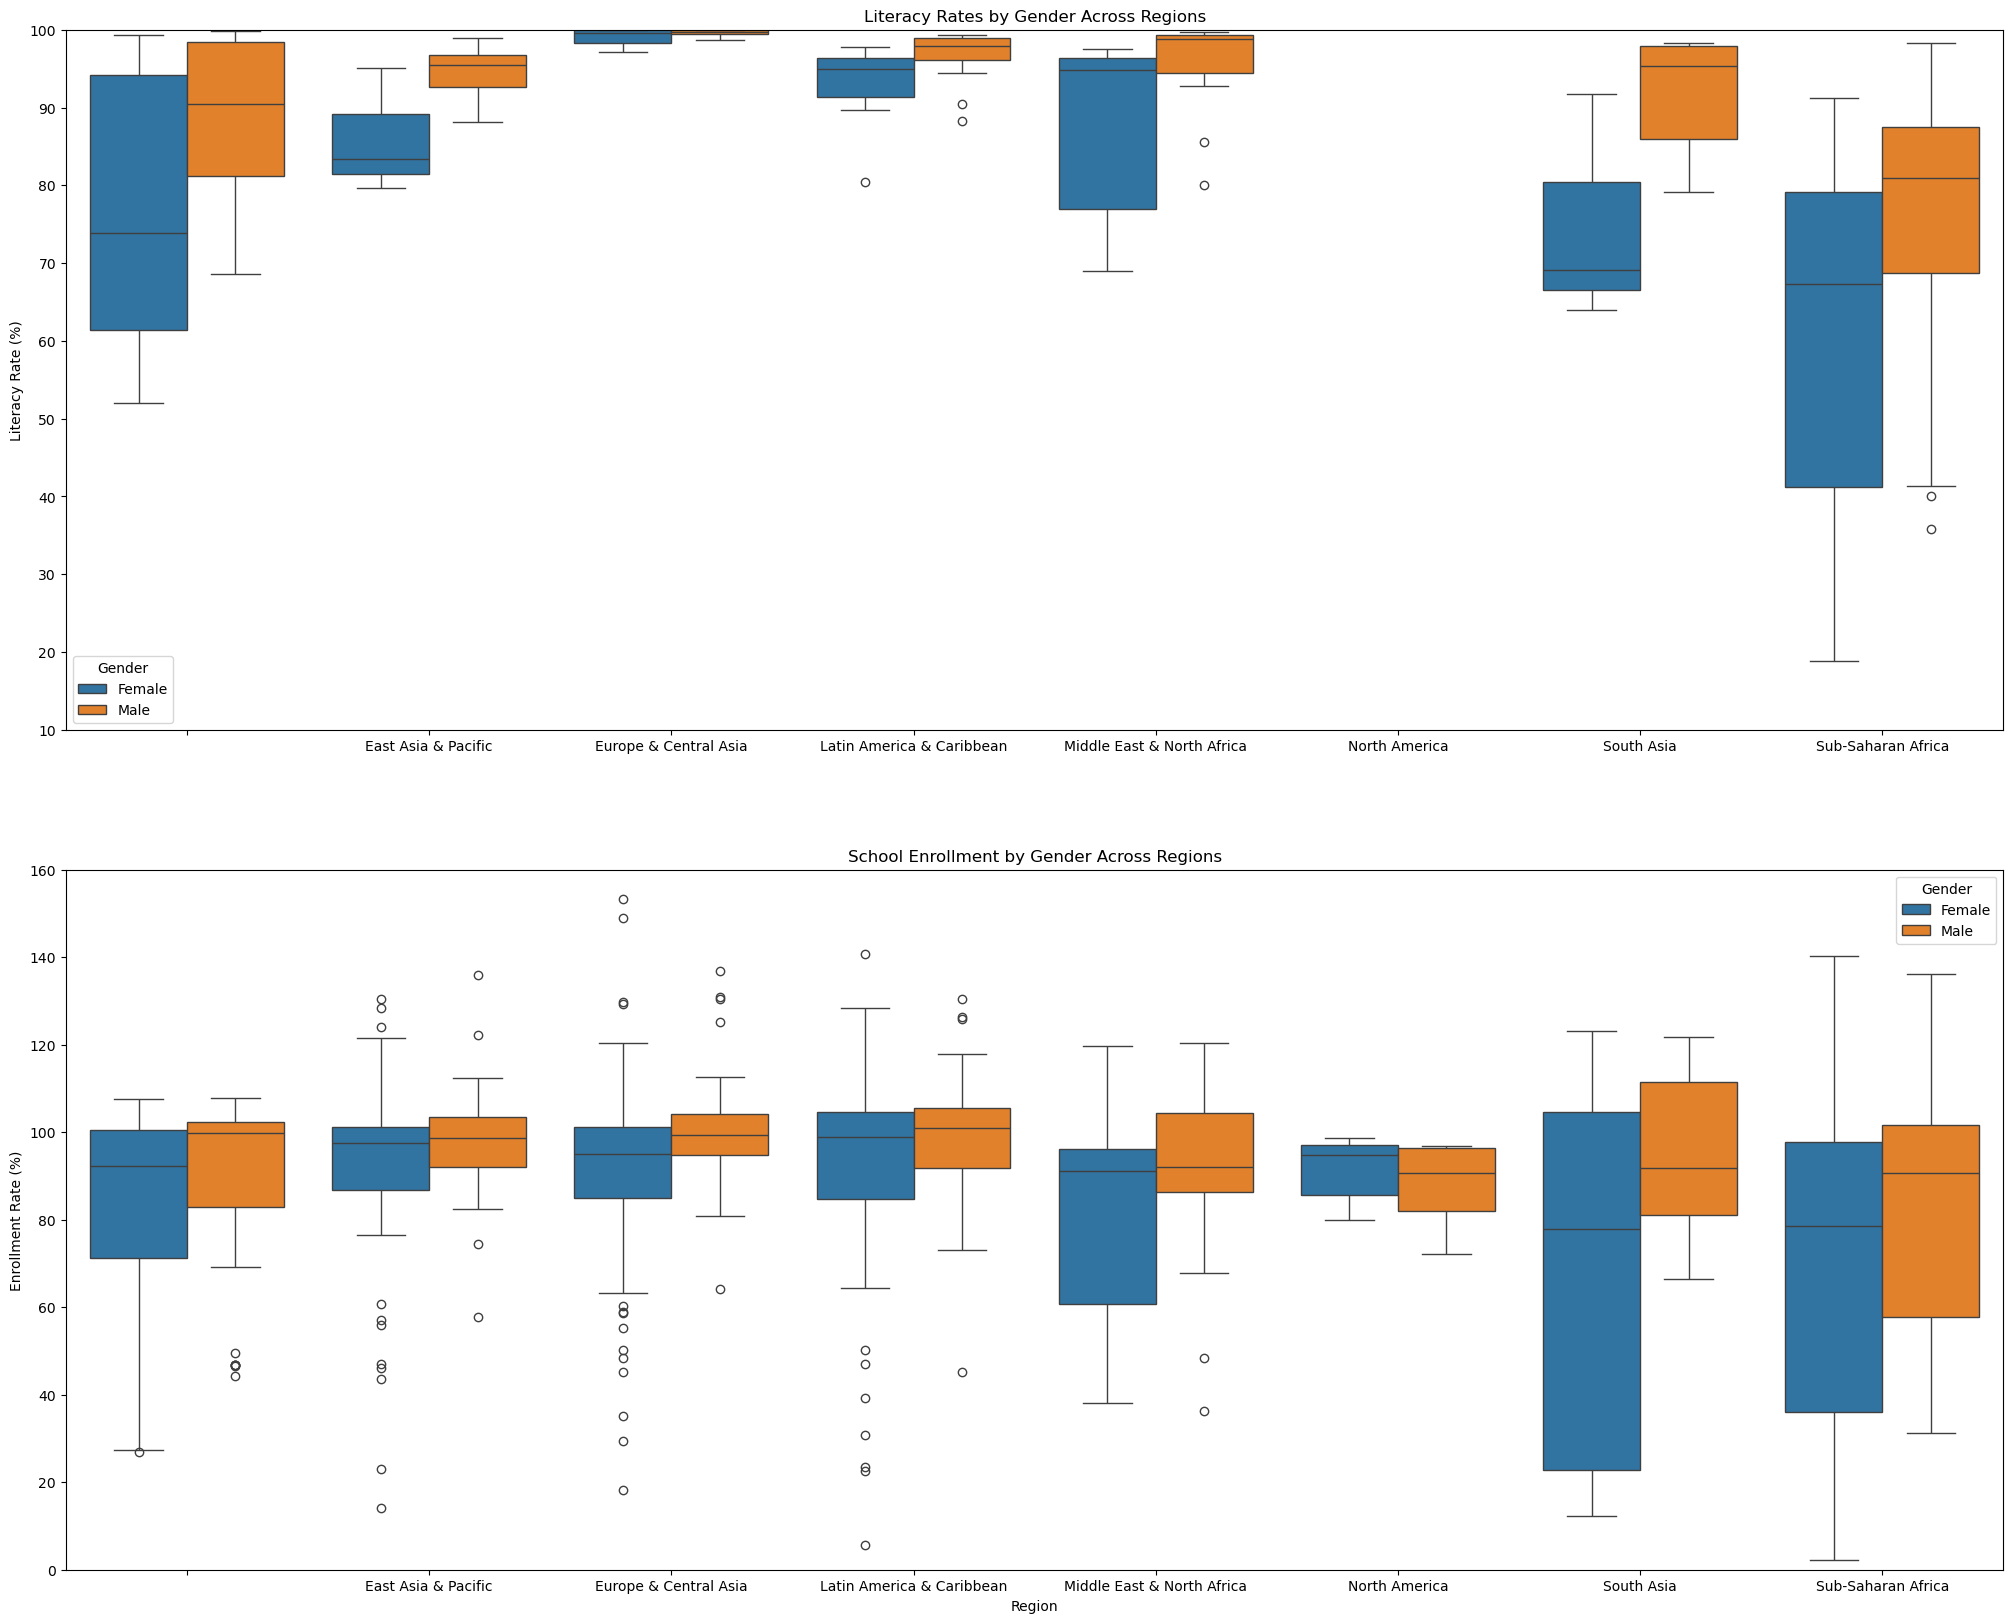

In [37]:

plt.figure(figsize=(25, 20))

# Boxplot for Literacy Rates by Gender
plt.subplot(2, 1, 1)
sns.boxplot(data=literacy_data, x='Region', y=year, hue='Gender')
plt.title('Literacy Rates by Gender Across Regions')
plt.xlabel('')
plt.ylabel('Literacy Rate (%)')
plt.legend(title='Gender')
plt.ylim(10, 100)


# Boxplot for School Enrollment by Gender
plt.subplot(2, 1, 2)
sns.boxplot(data=enrollment_data, x='Region', y=year, hue='Gender')
plt.title('School Enrollment by Gender Across Regions')
plt.xlabel('Region')
plt.ylabel('Enrollment Rate (%)')
plt.legend(title='Gender')
plt.ylim(0, 160)
plt.show()

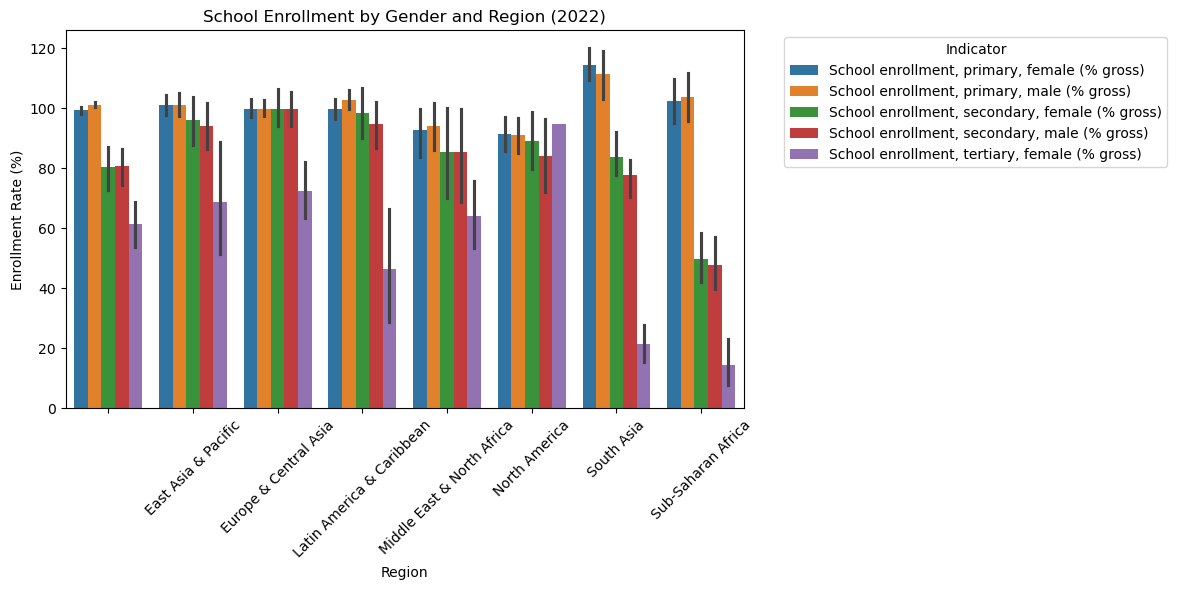

In [38]:
enrollment_data = filtered_data[filtered_data['Indicator Name_x'].str.contains('School enrollment')]

plt.figure(figsize=(12, 6))
sns.barplot(data=enrollment_data, x='Region', y='2022', hue='Indicator Name_x')
plt.title('School Enrollment by Gender and Region (2022)')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Enrollment Rate (%)')
plt.legend(title='Indicator', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


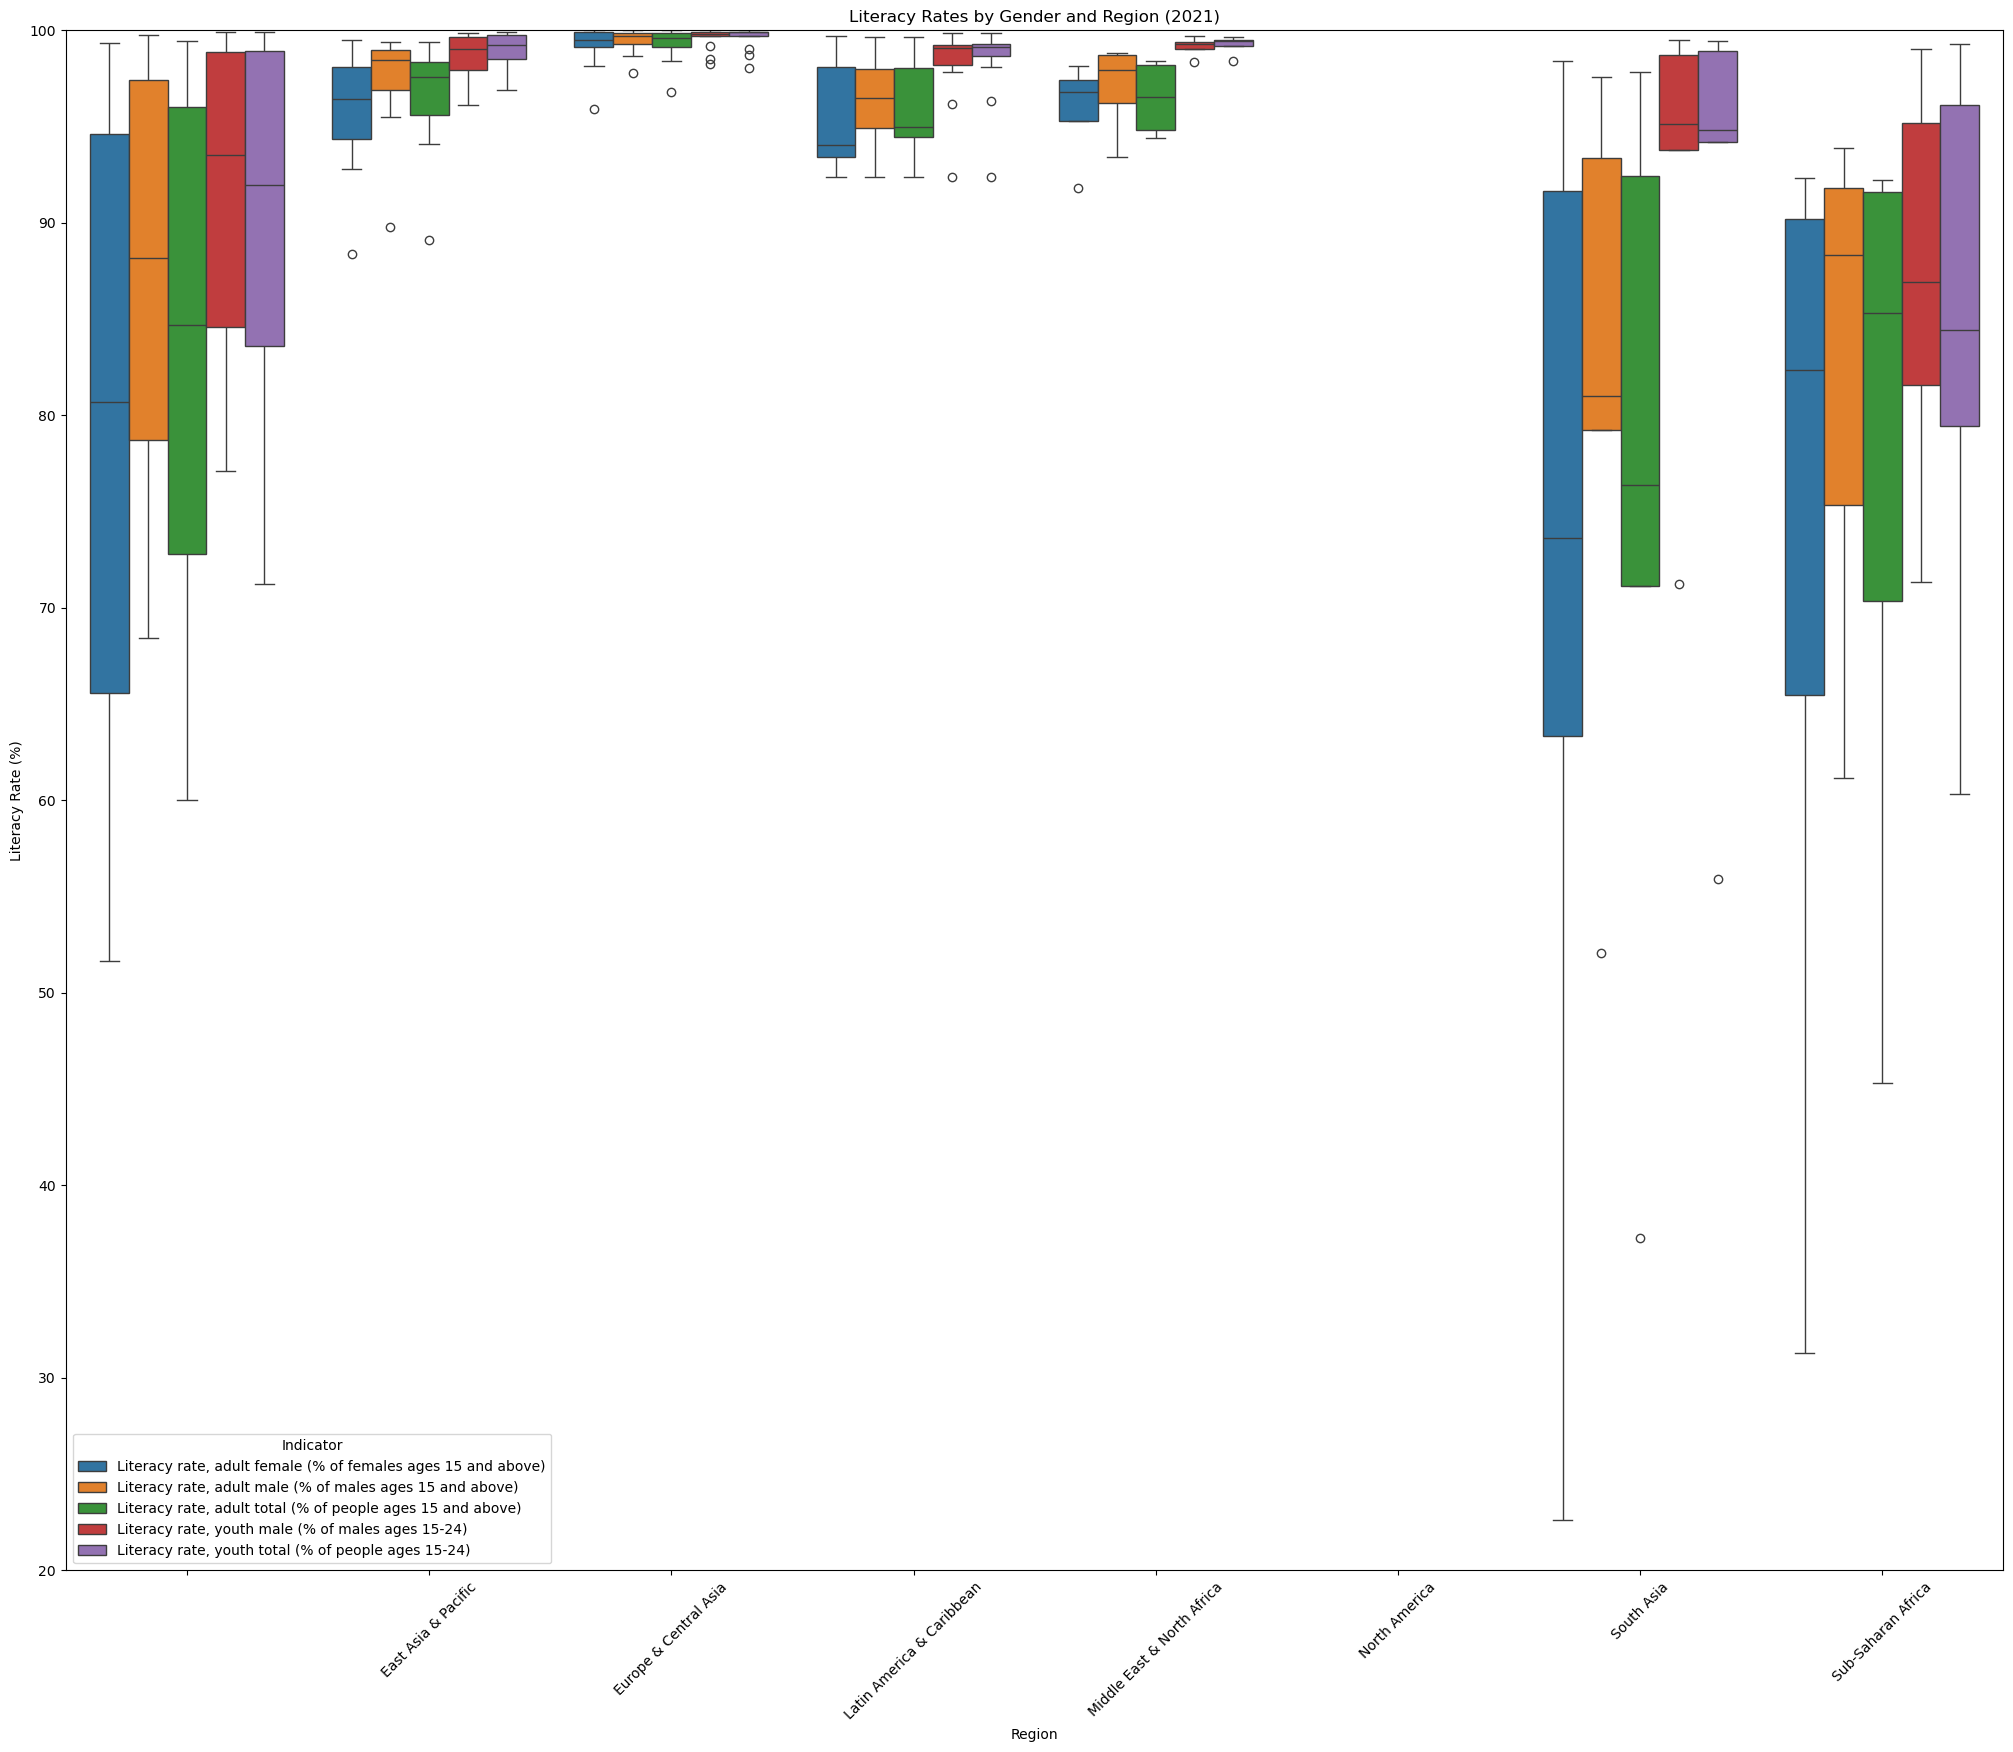

In [39]:
plt.figure(figsize=(25, 20))
sns.boxplot(data=filtered_data[filtered_data['Indicator Name_x'].str.contains('Literacy rate')],
            x='Region', y='2021', hue='Indicator Name_x')  # Adjust year as needed
plt.title('Literacy Rates by Gender and Region (2021)')
plt.xticks(rotation=45)
plt.xlabel('Region')
plt.ylabel('Literacy Rate (%)')
plt.legend(title='Indicator')
plt.ylim(20, 100)
plt.show()


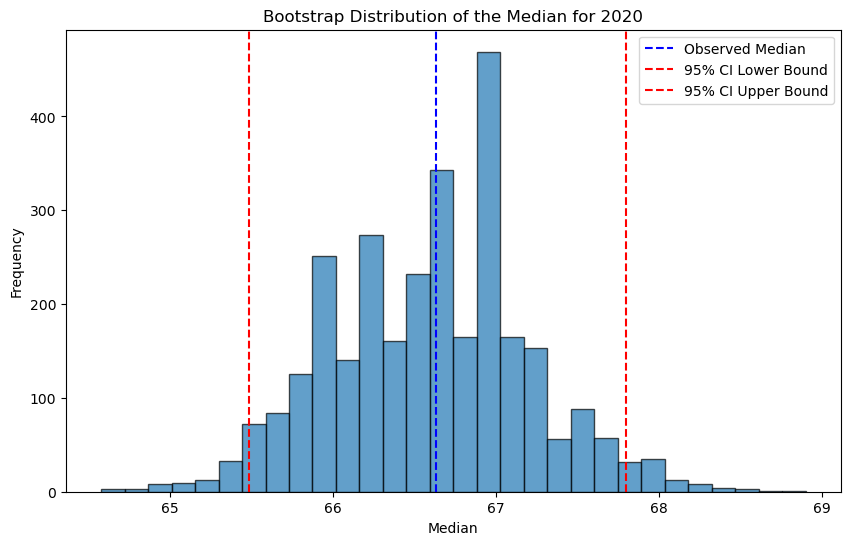

Observed Median for 2015: 66.62960266816836
95% Confidence Interval for Median: [65.48882244630987, 67.79953928739339]


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Choose the quantitative variable column for analysis (here I use '2020')
quantitative_variable = pd.to_numeric(arranged_data['2015'], errors='coerce').dropna()  # Convert to numeric and drop NaNs

# Number of bootstrap samples
n_bootstrap_samples = 3000

# Array to store the bootstrapped medians
bootstrap_medians = []

# Perform bootstrapping
for _ in range(n_bootstrap_samples):
    sample = np.random.choice(quantitative_variable, size=len(quantitative_variable), replace=True)
    bootstrap_medians.append(np.median(sample))

# Calculate the 95% confidence interval
lower_bound = np.percentile(bootstrap_medians, 2.5)
upper_bound = np.percentile(bootstrap_medians, 97.5)

# Plot the distribution of bootstrap medians
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_medians, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(np.median(quantitative_variable), color='blue', linestyle='--', label='Observed Median')
plt.axvline(lower_bound, color='red', linestyle='--', label='95% CI Lower Bound')
plt.axvline(upper_bound, color='red', linestyle='--', label='95% CI Upper Bound')
plt.title('Bootstrap Distribution of the Median for 2020')
plt.xlabel('Median')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print results
print(f"Observed Median for 2015: {np.median(quantitative_variable)}")
print(f"95% Confidence Interval for Median: [{lower_bound}, {upper_bound}]")

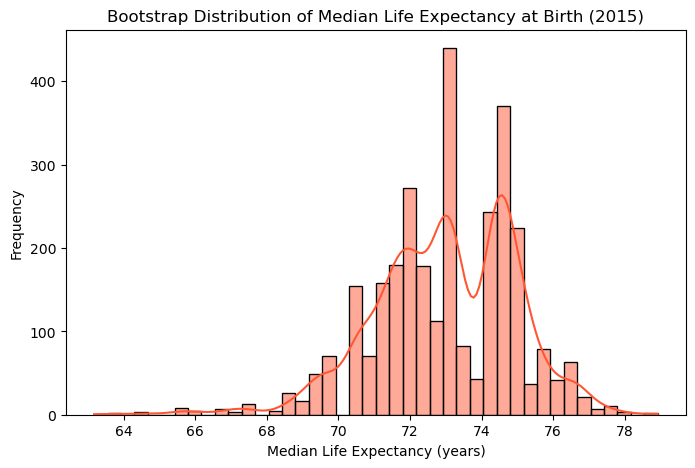

In [41]:
# Filter and convert data to numeric, handling non-numeric values
life_expectancy_data = pd.to_numeric(
    filtered_data[filtered_data['Indicator Name_x'] == 'Life expectancy at birth, total (years)']['2015'],
    errors='coerce'
).dropna()

# Simulate bootstrap samples
bootstrap_medians = []
for _ in range(3000):
    sample = np.random.choice(life_expectancy_data, size=int(len(life_expectancy_data) * 0.1), replace=True)
    bootstrap_medians.append(np.median(sample))

# Plot the distribution of bootstrap medians
plt.figure(figsize=(8, 5))
sns.histplot(bootstrap_medians, kde=True, color='#FF5733')
plt.title('Bootstrap Distribution of Median Life Expectancy at Birth (2015)')
plt.xlabel('Median Life Expectancy (years)')
plt.ylabel('Frequency')
plt.show()